In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [25]:
traindf = pd.read_csv('train_fare.csv')
traindf

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.10,-73.996214,40.726749,-74.009943,40.709942,1,3,7,7,5,9,1,0,0
1048571,9.70,-73.983244,40.730378,-73.956887,40.766790,2,2,1,24,1,19,0,0,1
1048572,6.90,-73.983217,40.767932,-73.984292,40.754990,1,3,5,23,2,12,1,0,0
1048573,30.27,-73.997512,40.683585,-73.955395,40.582122,5,5,8,25,1,11,1,0,0


In [26]:
testdf = pd.read_csv('test_fare.csv')
testdf

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,-73.973320,40.763805,-73.981430,40.743835,1,7,1,27,3,13,1,0,0
1,-73.986862,40.719383,-73.998886,40.739201,1,7,1,27,3,13,1,0,0
2,-73.982524,40.751260,-73.979654,40.746139,1,3,10,8,7,11,1,0,0
3,-73.981160,40.767807,-73.990448,40.751635,1,4,12,1,7,21,0,0,1
4,-73.966046,40.789775,-73.988565,40.744427,1,4,12,1,7,21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,7,5,10,1,12,1,0,0
9910,-73.945511,40.803600,-73.960213,40.776371,6,7,1,12,2,17,0,0,0
9911,-73.991600,40.726608,-73.789742,40.647011,6,7,4,19,1,20,0,0,1
9912,-73.985573,40.735432,-73.939178,40.801731,6,7,1,31,7,1,0,0,1


In [27]:
def cleandata(df):
    df = df[(-76 <= df['pickup_longitude']) & (df['dropoff_longitude'] <= -72)]
    df = df[(-76 <= df['dropoff_longitude']) & (df['pickup_longitude'] <= -72)]
    df = df[(38 <= df['pickup_latitude']) & (df['dropoff_latitude'] <= 42)]
    df = df[(38 <= df['dropoff_latitude']) & (df['pickup_latitude'] <= 42)]


    df = df[(0 < df['fare_amount']) & (df['fare_amount'] <= 250)]

    df = df[(df['dropoff_longitude'] != df['pickup_longitude'])]
    df = df[(df['dropoff_latitude'] != df['pickup_latitude'])]

    return df



In [28]:
traindf = cleandata(traindf)

In [29]:
traindf

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.10,-73.996214,40.726749,-74.009943,40.709942,1,3,7,7,5,9,1,0,0
1048571,9.70,-73.983244,40.730378,-73.956887,40.766790,2,2,1,24,1,19,0,0,1
1048572,6.90,-73.983217,40.767932,-73.984292,40.754990,1,3,5,23,2,12,1,0,0
1048573,30.27,-73.997512,40.683585,-73.955395,40.582122,5,5,8,25,1,11,1,0,0


In [30]:
from sklearn import preprocessing
def manhattan(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    return np.abs(dropoff_lat - pickup_lat) + np.abs(dropoff_long - pickup_long)


def add_coordinates_features(df):
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    long1 = df['pickup_longitude']
    long2 = df['dropoff_longitude']

    df['latdiff'] = lat1 - lat2
    df['longdiff'] = long1 - long2

def add_distances_features(df):
    # Add distances from airpot and downtown
    ny = (-74.0063889, 40.7141667)
    jfk = (-73.7822222222, 40.6441666667)
    ewr = (-74.175, 40.69)
    lgr = (-73.87, 40.77)

    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    long1 = df['pickup_longitude']
    long2 = df['dropoff_longitude']

    df['euclidean'] = (df['latdiff'] ** 2 + df['longdiff'] ** 2) ** 0.5
    df['manhattan'] = manhattan(lat1, long1, lat2, long2)
    
    df['downton_pickup_distance'] = manhattan(ny[0], ny[1], lat1, long1)
    df['downtown_dropoff_distance'] = manhattan(ny[0], ny[1], lat2, long2)
    df['jfk_pickup_distance'] = manhattan(jfk[0], jfk[1], lat1, long1)
    df['jfk_dropoff_distance'] = manhattan(jfk[0], jfk[1], lat2, long2)
    df['ewr_pickup_distance'] = manhattan(ewr[0], ewr[1], lat1, long1)
    df['ewr_dropoff_distance'] = manhattan(ewr[0], ewr[1], lat2, long2)
    df['lgr_pickup_distance'] = manhattan(lgr[0], lgr[1], lat1, long1)
    df['lgr_dropoff_distance'] = manhattan(lgr[0], lgr[1], lat2, long2)

    return df


In [31]:
add_coordinates_features(traindf)
add_coordinates_features(testdf)

traindf = add_distances_features(traindf)
testdf = add_distances_features(testdf)

traindf.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,...,euclidean,manhattan,downton_pickup_distance,downtown_dropoff_distance,jfk_pickup_distance,jfk_dropoff_distance,ewr_pickup_distance,ewr_dropoff_distance,lgr_pickup_distance,lgr_dropoff_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,...,0.009436,0.011742,229.286186,229.274444,228.992019,228.980277,229.430630,229.418888,229.205630,229.193888
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,...,0.079696,0.107481,229.447907,229.481828,229.153740,229.187661,229.592351,229.626272,229.367351,229.401272
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,...,0.013674,0.019212,229.464564,229.462360,229.170397,229.168193,229.609008,229.606804,229.384008,229.381804
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,...,0.025340,0.029386,229.440829,229.470215,229.146662,229.176048,229.585273,229.614659,229.360273,229.389659
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,...,0.019470,0.027194,229.456659,229.460973,229.162492,229.166806,229.601103,229.605417,229.376103,229.380417


In [32]:
testdf.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,...,euclidean,manhattan,downton_pickup_distance,downtown_dropoff_distance,jfk_pickup_distance,jfk_dropoff_distance,ewr_pickup_distance,ewr_dropoff_distance,lgr_pickup_distance,lgr_dropoff_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,7,1,27,3,13,...,0.021554,0.028080,229.457681,229.445821,229.163514,229.151654,229.602125,229.590265,229.377125,229.365266
1,-73.986862,40.719383,-73.998886,40.739201,1,7,1,27,3,13,...,0.023180,0.031841,229.426801,229.458642,229.132634,229.164476,229.571245,229.603087,229.346245,229.378087
2,-73.982524,40.751260,-73.979654,40.746139,1,3,10,8,7,11,...,0.005870,0.007991,229.454340,229.446349,229.160173,229.152182,229.598784,229.590793,229.373784,229.365793
3,-73.981160,40.767807,-73.990448,40.751635,1,4,12,1,7,21,...,0.018649,0.025460,229.469523,229.462639,229.175356,229.168472,229.613967,229.607083,229.388967,229.382083
4,-73.966046,40.789775,-73.988565,40.744427,1,4,12,1,7,21,...,0.050631,0.067867,229.476377,229.453548,229.182210,229.159381,229.620821,229.597992,229.395821,229.372992


In [33]:
drop_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

traincleandf = traindf.drop(drop_cols, axis=1)
testcleandf = testdf.drop(drop_cols, axis=1)

traincleandf.head()

,fare_amount,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,latdiff,...,euclidean,manhattan,downton_pickup_distance,downtown_dropoff_distance,jfk_pickup_distance,jfk_dropoff_distance,ewr_pickup_distance,ewr_dropoff_distance,lgr_pickup_distance,lgr_dropoff_distance
0,4.5,1,6,15,2,17,0,0,0,0.009041,...,0.009436,0.011742,229.286186,229.274444,228.992019,228.980277,229.430630,229.418888,229.205630,229.193888
1,16.9,2,1,5,3,16,0,0,0,-0.070701,...,0.079696,0.107481,229.447907,229.481828,229.153740,229.187661,229.592351,229.626272,229.367351,229.401272
2,5.7,3,8,18,5,0,0,0,1,0.010708,...,0.013674,0.019212,229.464564,229.462360,229.170397,229.168193,229.609008,229.606804,229.384008,229.381804
3,7.7,4,4,21,7,4,0,1,0,-0.024949,...,0.025340,0.029386,229.440829,229.470215,229.146662,229.176048,229.585273,229.614659,229.360273,229.389659
4,5.3,2,3,9,3,7,0,1,0,-0.015754,...,0.019470,0.027194,229.456659,229.460973,229.162492,229.166806,229.601103,229.605417,229.376103,229.380417


In [34]:
testcleandf.head()

,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,latdiff,longdiff,euclidean,manhattan,downton_pickup_distance,downtown_dropoff_distance,jfk_pickup_distance,jfk_dropoff_distance,ewr_pickup_distance,ewr_dropoff_distance,lgr_pickup_distance,lgr_dropoff_distance
0,7,1,27,3,13,1,0,0,0.019970,0.008110,0.021554,0.028080,229.457681,229.445821,229.163514,229.151654,229.602125,229.590265,229.377125,229.365266
1,7,1,27,3,13,1,0,0,-0.019817,0.012024,0.023180,0.031841,229.426801,229.458642,229.132634,229.164476,229.571245,229.603087,229.346245,229.378087
2,3,10,8,7,11,1,0,0,0.005121,-0.002870,0.005870,0.007991,229.454340,229.446349,229.160173,229.152182,229.598784,229.590793,229.373784,229.365793
3,4,12,1,7,21,0,0,1,0.016172,0.009288,0.018649,0.025460,229.469523,229.462639,229.175356,229.168472,229.613967,229.607083,229.388967,229.382083
4,4,12,1,7,21,0,0,1,0.045348,0.022519,0.050631,0.067867,229.476377,229.453548,229.182210,229.159381,229.620821,229.597992,229.395821,229.372992


In [35]:
traindf, validatedf = train_test_split(traincleandf, test_size=0.10, random_state=1)

train_labels = traindf['fare_amount'].values
validatedf_labels = validatedf['fare_amount'].values
traindf = traindf.drop(['fare_amount'], axis=1)
validatedf = validatedf.drop(['fare_amount'], axis=1)

In [36]:
scaler = preprocessing.MinMaxScaler()
traindf_scaled = scaler.fit_transform(traindf)
validatedf_scaled = scaler.transform(validatedf)
test_scaled = scaler.transform(testcleandf)

In [37]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = traindf_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [38]:
history = model.fit(x=traindf_scaled, y=train_labels, batch_size=256, epochs=50,
                    verbose=1, validation_data=(validatedf_scaled, validatedf_labels),
                    shuffle=True)

Epoch 1/50
3646/3646 [==============================] - 7s 2ms/step - loss: 48.2752 - mae: 5.0553 - val_loss: 38.2987 - val_mae: 5.6030
Epoch 2/50
3646/3646 [==============================] - 6s 2ms/step - loss: 7.4028 - mae: 1.7011 - val_loss: 7.6874 - val_mae: 1.7125
Epoch 3/50
3646/3646 [==============================] - 6s 2ms/step - loss: 7.2585 - mae: 1.6768 - val_loss: 7.1816 - val_mae: 1.6117
Epoch 4/50
3646/3646 [==============================] - 6s 2ms/step - loss: 7.1484 - mae: 1.6565 - val_loss: 15.9070 - val_mae: 2.9306
Epoch 5/50
3646/3646 [==============================] - 6s 2ms/step - loss: 7.0136 - mae: 1.6326 - val_loss: 8.2210 - val_mae: 1.7570
Epoch 6/50
3646/3646 [==============================] - 6s 2ms/step - loss: 6.8918 - mae: 1.6108 - val_loss: 7.0901 - val_mae: 1.6193
Epoch 7/50
3646/3646 [==============================] - 6s 2ms/step - loss: 6.8016 - mae: 1.6000 - val_loss: 8.7135 - val_mae: 2.1286
Epoch 8/50
3646/3646 [==============================] - 6s 

In [39]:
def plotloss(history):
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()


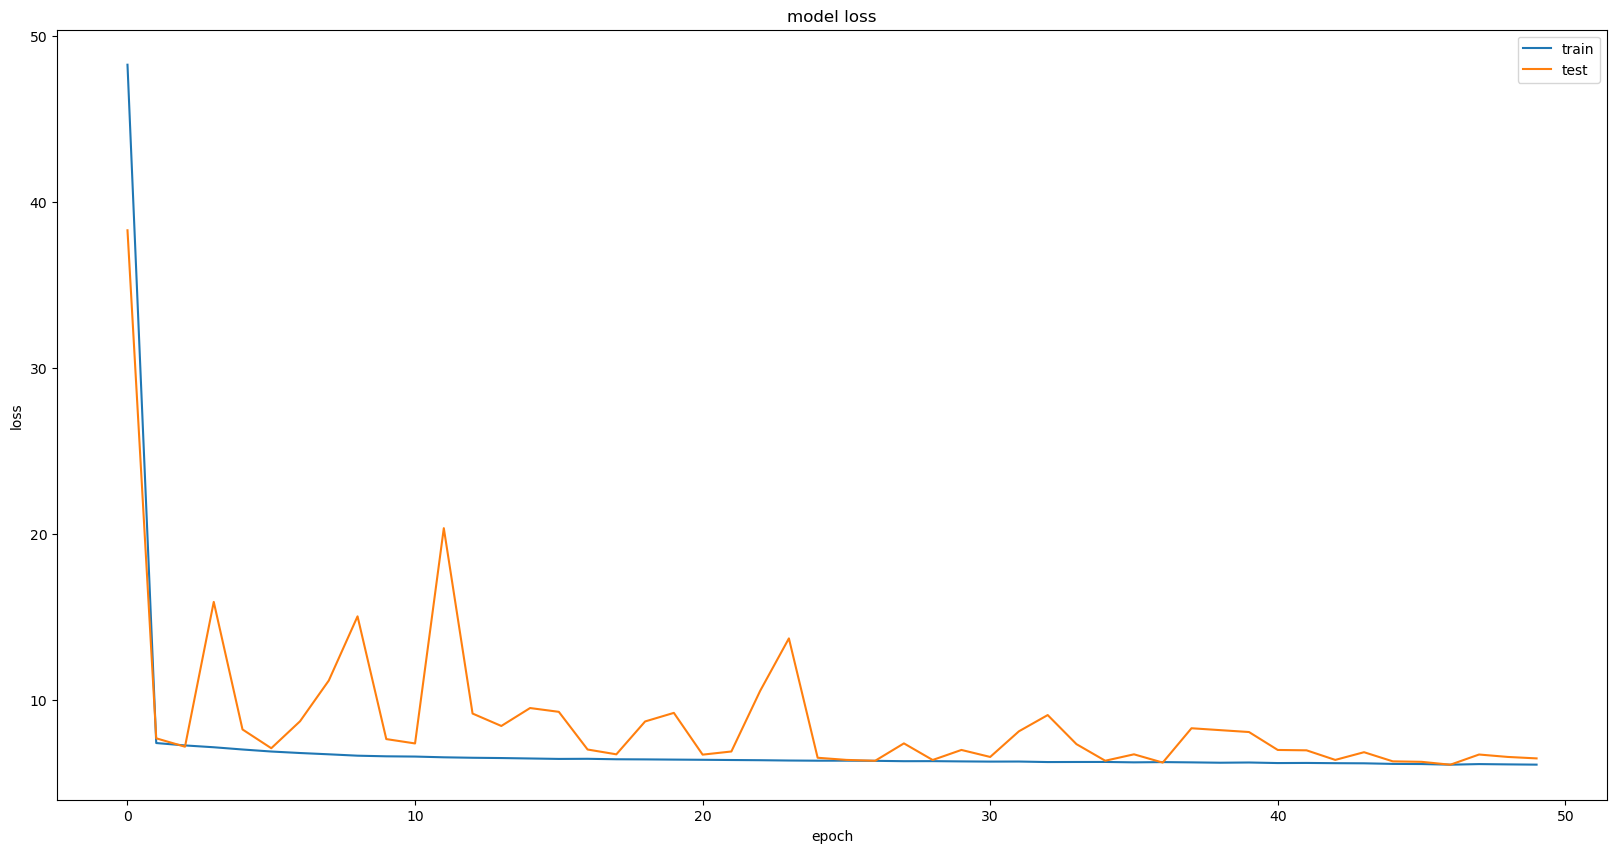

In [40]:
plotloss(history)

In [41]:
prediction_data = model.predict(test_scaled, batch_size=128, verbose=1)

78/78 [==============================] - 0s 519us/step


In [44]:
def output_sub(raw_test, prediction_data, prediction_column, filename):
    df = pd.DataFrame(prediction_data, columns=[prediction_column])
    df[[prediction_column]].to_csv((filename), index=False)
    print('Output saved.')

In [45]:
output_sub(testdf, prediction_data, 'fare_amount', 'prediction_data.csv')

Output saved.
